In [1]:
%matplotlib inline

import numpy as np
from dolfin import *
from mshr import *

In [2]:
parameters['reorder_dofs_serial'] = False
parameters['allow_extrapolation'] = True

## Solve the Heat equation on a square

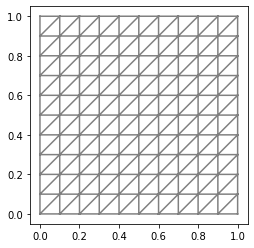

In [3]:
#example of mesh
example_mesh = RectangleMesh(Point(0,0), Point(1,1), 10, 10)
plot(example_mesh)

In [4]:
# Now define a mesh with more elements for the actual solution
elements = 75
square_mesh = RectangleMesh(Point(0,0), Point(1,1), elements, elements)

In [5]:
# 'Lagrange' are piecewise linear functions. The last argument is the degree
FS_square = FunctionSpace(square_mesh,'Lagrange',1)

In [6]:
# Create placeholders for the trial and test functions
u = TrialFunction(FS_square)
v = TestFunction(FS_square)

Build a symbolid representation of

$\int\limits_{\Omega} ∇ u · \nabla v dx = \int\limits_{\Omega} vf dx$

In [7]:
left_integrand = inner(nabla_grad(u), nabla_grad(v))*dx
f1 =  Constant(1.0)
right_integrand = f1*v*dx

In [8]:
# Boundary 
u0 = Constant(0)

def u0_boundary(x, on_boundary):
    return on_boundary #???

BC_square = DirichletBC(FS_square, u0, u0_boundary)

In [9]:
#set up linear algebra problem
A = assemble(left_integrand)
b = assemble(right_integrand)
BC_square.apply(A,b)

In [10]:
#solve the problem
u0_sol = Function(FS_square) # placeholder for solution
solve(A, u0_sol.vector(), b)

1

In [11]:
# Easier way to put it together
solve(left_integrand == right_integrand, u0_sol, BC_square)

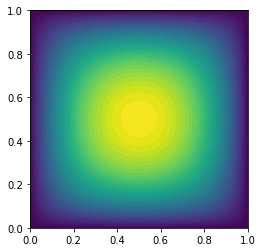

In [12]:
plot(u0_sol)

### Complex Boundary Conditions

$u(x=0)=3, u(x=1) = -1, u(y=0) = -5, u(y=1) = 5$

In [13]:
def top_boundary(x, on_boundary):
    return on_boundary and abs(x[1]-1) < 1e-5
def bottom_boundary(x, on_boundary):
    return on_boundary and abs(x[1]) < 1e-5
def left_boundary(x, on_boundary):
    return on_boundary and abs(x[0]) < 1e-5
def right_boundary(x, on_boundary):
    return on_boundary and abs(x[0]-1) < 1e-5

In [14]:
top_bc = DirichletBC(FS_square, Constant(5), top_boundary)
bottom_bc = DirichletBC(FS_square, Constant(-5), bottom_boundary)
left_bc = DirichletBC(FS_square, Constant(3), left_boundary)
right_bc = DirichletBC(FS_square, Constant(-1), right_boundary)
boundaries = [top_bc, bottom_bc, left_bc, right_bc]

In [15]:
sol = Function(FS_square)
solve(left_integrand == right_integrand, sol, boundaries)

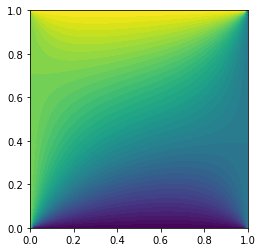

In [16]:
plot(sol)